# Image classification example

[Source](https://auto.gluon.ai/stable/tutorials/multimodal/image_prediction/beginner_image_cls.html)

In [1]:
import os

import pandas as pd
from autogluon.multimodal.utils.misc import shopee_dataset

In [2]:
PATH_DATA = os.path.join('data', 'shopee')
train_data_path, test_data_path = shopee_dataset(PATH_DATA)
print(train_data_path)

                                                 image  label
0    /home/xcha011/workspace/autogluon_demo/data/sh...      0
1    /home/xcha011/workspace/autogluon_demo/data/sh...      0
2    /home/xcha011/workspace/autogluon_demo/data/sh...      0
3    /home/xcha011/workspace/autogluon_demo/data/sh...      0
4    /home/xcha011/workspace/autogluon_demo/data/sh...      0
..                                                 ...    ...
795  /home/xcha011/workspace/autogluon_demo/data/sh...      3
796  /home/xcha011/workspace/autogluon_demo/data/sh...      3
797  /home/xcha011/workspace/autogluon_demo/data/sh...      3
798  /home/xcha011/workspace/autogluon_demo/data/sh...      3
799  /home/xcha011/workspace/autogluon_demo/data/sh...      3

[800 rows x 2 columns]


In [3]:
train_data_byte, test_data_byte = shopee_dataset(PATH_DATA, is_bytearray=True)

In [4]:
import uuid

from autogluon.multimodal import MultiModalPredictor

In [5]:
PATH_MODEL = os.path.join('models', f'shopee_{uuid.uuid4().hex}')
print(PATH_MODEL)

models/shopee_df1ca901c5024ffc85771df1c6457166


In [6]:
predictor = MultiModalPredictor(label="label", path=PATH_MODEL)
predictor.fit(
    train_data=train_data_byte, # you can use train_data_byte as well
    time_limit=300, # seconds
) # you can trust the default config, e.g., we use a `swin_base_patch4_window7_224` model

AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 3, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Global seed set to 0
AutoMM starts to create your model. ✨

- AutoGluon version is 0.8.2.

- Pytorch version is 1.13.1+cu117.

- Model will be saved to "/home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166".

- Validation metric is "accuracy".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 2: 'val_accuracy' reached 0.31875 (best 0.31875), saving model to '/home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166/epoch=0-step=2.ckpt' as top 3
Time limit reached. Elapsed time is 0:05:02. Signaling Trainer to stop.


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 4: 'val_accuracy' reached 0.74375 (best 0.74375), saving model to '/home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166/epoch=0-step=4.ckpt' as top 3
Start to fuse 2 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model 🎉🎉🎉

- To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166")
    ```

- You can open a terminal and launch Tensorboard to visualize the training log:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166
    ```

- If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub: https://github.com/autogluon/autogluon




In [7]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: 0it [00:00, ?it/s]

Top-1 test acc: 0.750


## Predict a new image

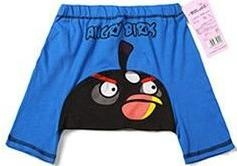

In [8]:
from IPython.display import Image, display

image_path = test_data_path.iloc[0]['image']
pil_img = Image(filename=image_path)
display(pil_img)

In [9]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

[1]


In [10]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

[[0.33227453 0.3813275  0.15347949 0.13291843]]


In [11]:
image_byte = test_data_byte.iloc[0]['image']
predictions = predictor.predict({'image': [image_byte]})
print(predictions)

proba = predictor.predict_proba({'image': [image_byte]})
print(proba)

[1]
[[0.33227453 0.3813275  0.15347949 0.13291843]]


## Extract embeddings

In [12]:
feature = predictor.extract_embedding({'image': [image_path]})
print(feature[0].shape)

(1024,)


In [13]:
feature = predictor.extract_embedding({'image': [image_byte]})
print(feature[0].shape)

(1024,)


## Save and Load Model

In [14]:
loaded_predictor = MultiModalPredictor.load(PATH_MODEL)
load_proba = loaded_predictor.predict_proba({'image': [image_path]})
print(load_proba)

Load pretrained checkpoint: /home/xcha011/workspace/autogluon_demo/models/shopee_df1ca901c5024ffc85771df1c6457166/model.ckpt


[[0.33227453 0.3813275  0.15347949 0.13291843]]
